In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_excel('SampleData.xlsx', sheet_name='SalesOrders')

In [81]:
df.head(10)

,OrderDate,Region,Rep,Item,Units,Unit Cost,Total
0,2019-01-06,East,Jones,Pencil,95,1.99,189.05
1,2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2,2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
3,2019-02-26,Central,Gill,Pen,27,19.99,539.73
4,2019-03-15,West,Sorvino,Pencil,56,2.99,167.44
5,2019-04-01,East,Jones,Binder,60,4.99,299.40
6,2019-04-18,Central,Andrews,Pencil,75,1.99,149.25
7,2019-05-05,Central,Jardine,Pencil,90,4.99,449.10
8,2019-05-22,West,Thompson,Pencil,32,1.99,63.68
9,2019-06-08,East,Jones,Binder,60,8.99,539.40


In [83]:
df.Units.mean()

49.325581395348834

In [84]:
df.groupby('Region').mean()

,Units,Unit Cost,Total
Region,,,
Central,49.958333,18.018750,464.127917
East,53.153846,9.143846,461.699231
West,38.500000,53.658333,414.453333


In [87]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Units,43.0,49.325581,30.078248,2.00,27.50,53.00,74.50,96.00
Unit Cost,43.0,20.308605,47.345118,1.29,3.99,4.99,17.99,275.00
Total,43.0,456.462326,447.022104,9.03,144.59,299.40,600.18,1879.06


In [88]:
df.Region.value_counts()

Central    24
East       13
West        6
Name: Region, dtype: int64

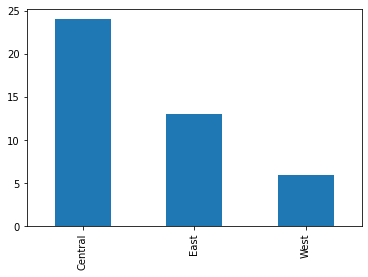

In [16]:
df.Region.value_counts().plot.bar()

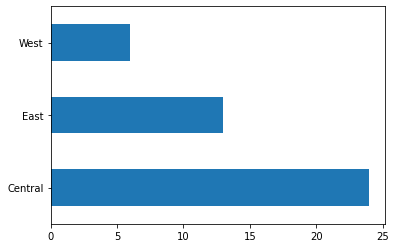

In [15]:
df.Region.value_counts().plot.barh()

In [90]:
df = df.set_index('OrderDate')

In [91]:
df.head()

,Region,Rep,Item,Units,Unit Cost,Total
OrderDate,,,,,,
2019-01-06,East,Jones,Pencil,95,1.99,189.05
2019-01-23,Central,Kivell,Binder,50,19.99,999.50
2019-02-09,Central,Jardine,Pencil,36,4.99,179.64
2019-02-26,Central,Gill,Pen,27,19.99,539.73
2019-03-15,West,Sorvino,Pencil,56,2.99,167.44


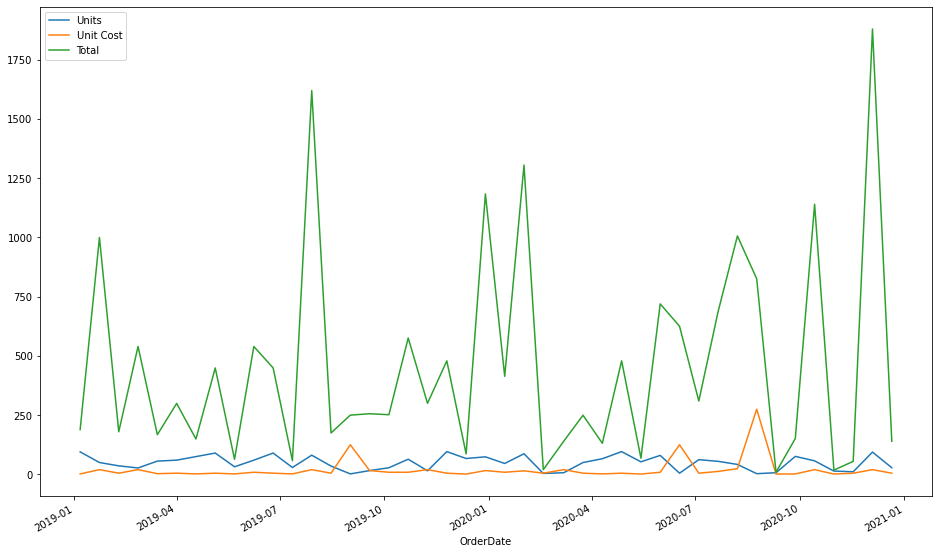

In [93]:
df.plot.line(figsize=(16,10))

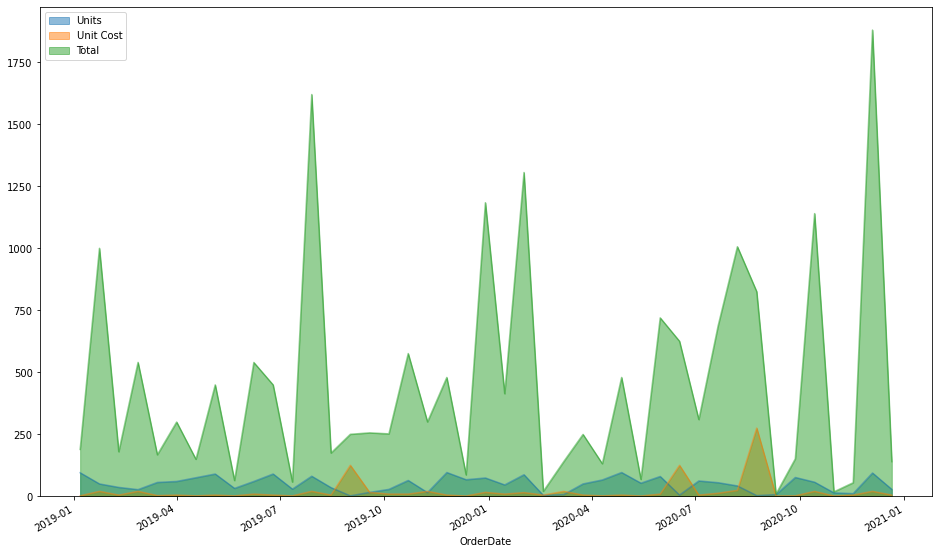

In [95]:
df.plot.area(stacked=False,figsize=(16,10))

In [31]:
df.Rep.value_counts()

Jones       8
Gill        5
Jardine     5
Kivell      4
Andrews     4
Sorvino     4
Parent      3
Morgan      3
Smith       3
Thompson    2
Howard      2
Name: Rep, dtype: int64

In [32]:
df.pivot_table(index=['Region', 'Rep'], values=['Units','Unit Cost'], aggfunc=np.sum)

Unit Cost  Units
Region  Rep                       
Central Andrews       10.26    183
        Gill          40.55    213
        Jardine       39.95    281
        Kivell       173.93    193
        Morgan        26.47    173
        Smith        141.29    156
East    Howard         6.98    125
        Jones         55.92    396
        Parent        55.97    170
West    Sorvino      299.97    142
        Thompson      21.98     89

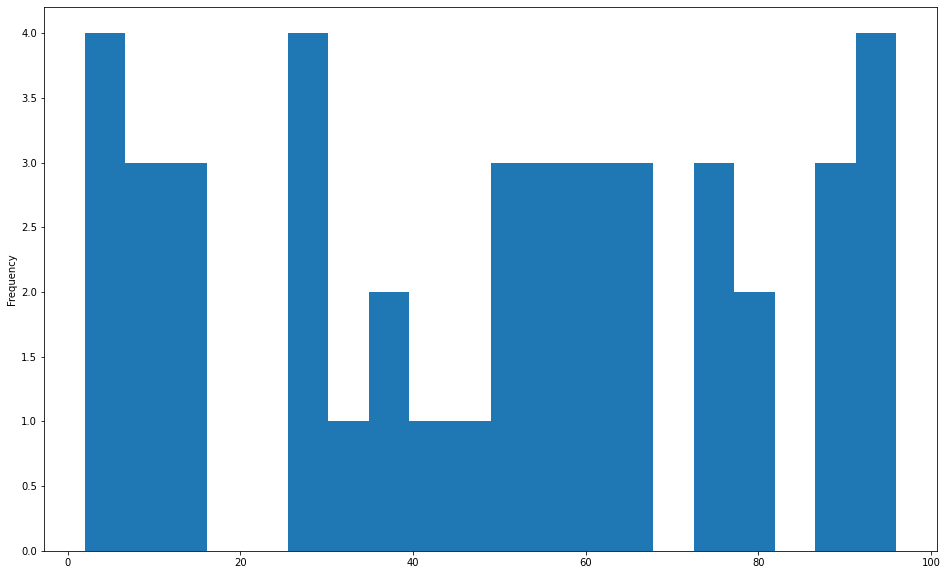

In [97]:
df.Units.plot.hist(bins=20, figsize=(16,10))

In [51]:
grouped_avg = df.groupby('Region').mean()

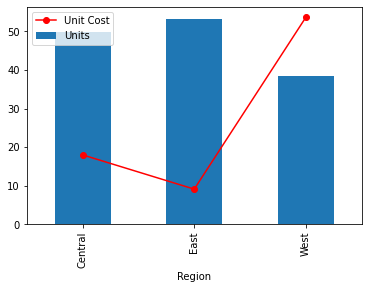

In [55]:
ax = grouped_avg[['Unit Cost']].plot(linestyle='-', marker='o', color='r')
grouped_avg[['Units']].plot(kind='bar', ax=ax)

In [58]:
grouped_sum = df.groupby('Region').sum()[['Total']]

In [59]:
grouped_sum

,Total
Region,
Central,11139.07
East,6002.09
West,2486.72


In [98]:
grouped_sum["cummulative_percentage"] = grouped_sum["Total"].cumsum()/grouped_sum["Total"].sum()*100

In [99]:
grouped_sum

,Total,cummulative_%,cummulative_percentage
Region,,,
Central,11139.07,56.751264,56.751264
East,6002.09,87.330675,87.330675
West,2486.72,100.000000,100.000000


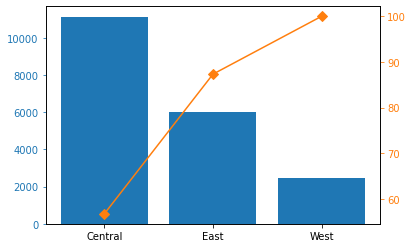

In [66]:
fig, ax = plt.subplots()
ax.bar(grouped_sum.index, grouped_sum["Total"], color="C0")
ax2 = ax.twinx()
ax2.plot(grouped_sum.index, grouped_sum["cummulative_percentage"], color="C1", marker="D", ms=7)

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

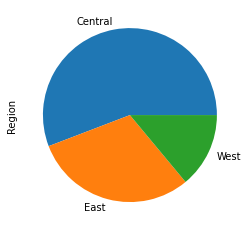

In [68]:
df.Region.value_counts().plot.pie()

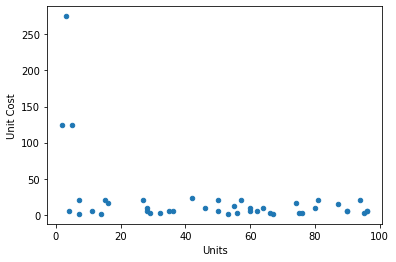

In [100]:
df.plot.scatter(x='Units', y='Unit Cost')